# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

# TODO

- impacto de IO e MALLOC:
    - graficos tempo X tamanho da entrada X com e sem io para os 4 casos (com barras de erros). Existe diferença consistente entre as diferentes regiões?
    - graficos de barra com tempo de IO (diferenca entre com e sem) em porcentagem do total. responder se é consistentee

- diferenças nas tres versões (avaliar com 4 threads):
    - grafico tempo X tamanho da entrada X seq_omp_pth para os 4 casos
    - grafico de barras - redução percentual do tempo de computação para cada programa para cada tamanho de entrada

- diferenças das regiões (avaliar com 4 threads):
    - grafico tempo X tamanho da entrada X região para os 3 tipos de código
    - imagem das quatro regiões e explicar como isso afeta o tempo de execução

- diferenças de threads:
    - grafico tempo X n_threads X seq_omp_pth -> fazer para tres tamanhos de entrada padrao - 2^0, 2^3,2^5
    - explicar comportamento dado n processadores

# Loading Results

In [30]:
res = pd.read_csv("experiments.csv")
regions = ["full", "seahorse", "elephant", "spiral"]

# Functions

In [45]:
def diff_io_calc(res):
    filtered_data = [res.query(f"VERSION == 'mandelbrot_seq' and IO_MALLOC_FLAG == {i}") for i in range(2)]
    size = filtered_data[1].SIZE
    diff = filtered_data[1].AVG_TOTAL_TIME.values - filtered_data[0].AVG_TOTAL_TIME.values
    error = np.sqrt(filtered_data[1].STD_TOTAL_TIME.values**2 + filtered_data[0].STD_TOTAL_TIME.values**2)
    return size, diff, error

# Graphs

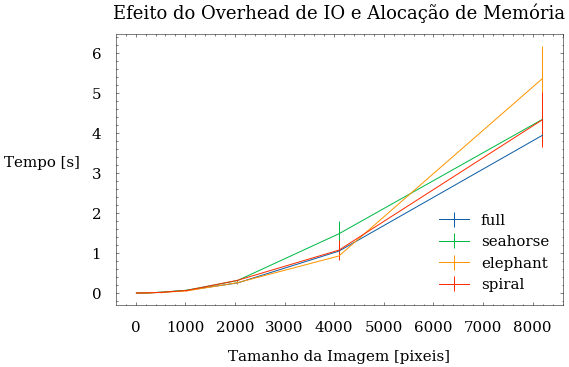

In [56]:
fig,ax = plt.subplots(figsize=(8,5));
for region in regions:
    size, diff, error = diff_io_calc(res.query(f"REGION == '{region}'"))
    ax.errorbar(size,diff,yerr=error ,label=region); #,'k--',dashes=[10,8]

ax.set_title("Efeito do Overhead de IO e Alocação de Memória",fontsize=18, pad = 15);
ax.set_xlabel('Tamanho da Imagem [pixeis]', fontsize=15, labelpad = 15);
ax.set_ylabel('Tempo [s]', fontsize=15, rotation = 0, labelpad = 50);
ax.tick_params(axis='both', which='major', labelsize=15, pad=15);
ax.legend(loc='lower right',fontsize=15);


In [6]:
f = res.query("VERSION == 'mandelbrot_seq' and REGION == 'elephant'")

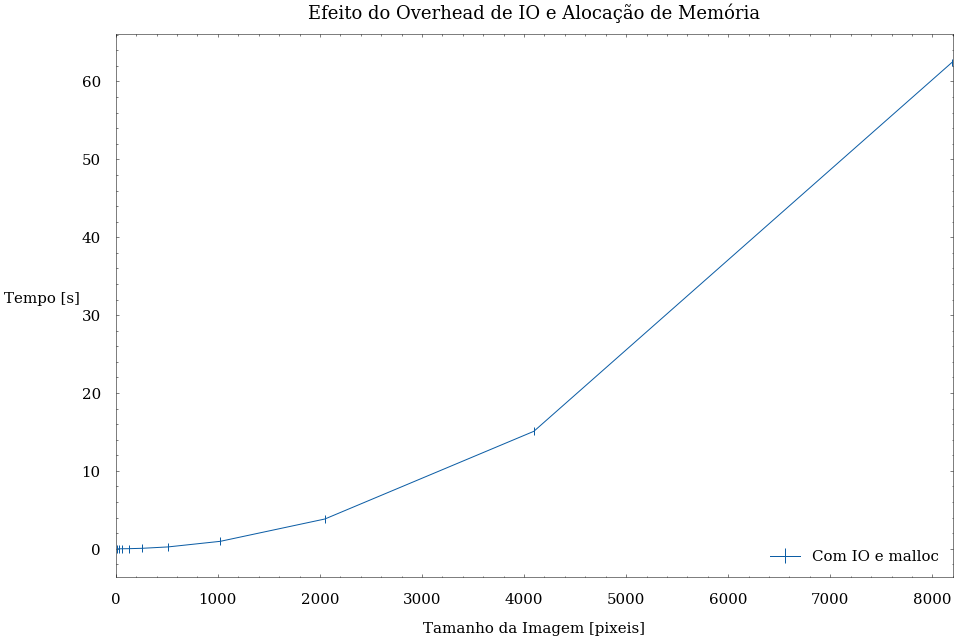

In [7]:
fig,ax = plt.subplots(figsize=(15,10));
ax.errorbar(f.query("IO_MALLOC_FLAG == 1").SIZE,f.query("IO_MALLOC_FLAG == 1").AVG_TOTAL_TIME,yerr=0.5 ,label="Com IO e malloc"); #,'k--',dashes=[10,8]
#ax.plot(f.query("IO_MALLOC_FLAG == 0").SIZE,f.query("IO_MALLOC_FLAG == 0").AVG_TOTAL_TIME, label="Sem IO e malloc");
ax.set_title("Efeito do Overhead de IO e Alocação de Memória",fontsize=18, pad = 15);
ax.set_xlabel('Tamanho da Imagem [pixeis]', fontsize=15, labelpad = 15);
ax.set_ylabel('Tempo [s]', fontsize=15, rotation = 0, labelpad = 40);
ax.tick_params(axis='both', which='major', labelsize=15, pad=15);
ax.legend(loc='lower right',fontsize=15);
ax.set_xlim([0,8200]);


In [36]:
f

,VERSION,REGION,IO_MALLOC_FLAG,SIZE,THREAD_NUM,AVG_TOTAL_TIME,STD_TOTAL_TIME,%STD
2,mandelbrot_seq,elephant,0,16,1,0.001201,0.000110,9.15%
6,mandelbrot_seq,elephant,0,32,1,0.001980,0.000121,6.12%
10,mandelbrot_seq,elephant,0,64,1,0.005387,0.000137,2.55%
14,mandelbrot_seq,elephant,0,128,1,0.017511,0.000506,2.89%
18,mandelbrot_seq,elephant,0,256,1,0.058590,0.000486,0.83%
22,mandelbrot_seq,elephant,0,512,1,0.226490,0.002310,1.02%
26,mandelbrot_seq,elephant,0,1024,1,0.907450,0.006240,0.69%
30,mandelbrot_seq,elephant,0,2048,1,3.567400,0.013400,0.38%
34,mandelbrot_seq,elephant,0,4096,1,14.158800,0.029900,0.21%
38,mandelbrot_seq,elephant,0,8192,1,57.086000,0.261000,0.46%


In [12]:
f

,VERSION,REGION,IO_MALLOC_FLAG,SIZE,THREAD_NUM,AVG_TOTAL_TIME,STD_TOTAL_TIME,%STD
0,mandelbrot_seq,full,0,16,1,0.000733,0.000051,6.92%
4,mandelbrot_seq,full,0,32,1,0.000870,0.000032,3.67%
8,mandelbrot_seq,full,0,64,1,0.001346,0.000055,4.05%
12,mandelbrot_seq,full,0,128,1,0.003455,0.000112,3.24%
16,mandelbrot_seq,full,0,256,1,0.009920,0.000238,2.40%
20,mandelbrot_seq,full,0,512,1,0.034459,0.000807,2.34%
24,mandelbrot_seq,full,0,1024,1,0.130660,0.000820,0.63%
28,mandelbrot_seq,full,0,2048,1,0.512520,0.002760,0.54%
32,mandelbrot_seq,full,0,4096,1,2.029260,0.002840,0.14%
36,mandelbrot_seq,full,0,8192,1,8.162500,0.095700,1.17%


In [31]:
res

,VERSION,REGION,IO_MALLOC_FLAG,SIZE,THREAD_NUM,AVG_TOTAL_TIME,STD_TOTAL_TIME,%STD
0,mandelbrot_seq,full,0,16,1,0.000733,0.000051,6.92%
1,mandelbrot_seq,seahorse,0,16,1,0.000961,0.000058,5.99%
2,mandelbrot_seq,elephant,0,16,1,0.001201,0.000110,9.15%
3,mandelbrot_seq,spiral,0,16,1,0.001057,0.000083,7.86%
4,mandelbrot_seq,full,0,32,1,0.000870,0.000032,3.67%
...,...,...,...,...,...,...,...,...
555,mandelbrot_seq,spiral,1,4096,1,18.255000,0.176000,0.96%
556,mandelbrot_seq,full,1,8192,1,12.106400,0.047700,0.39%
557,mandelbrot_seq,seahorse,1,8192,1,64.631000,0.545000,0.84%
558,mandelbrot_seq,elephant,1,8192,1,62.448000,0.777000,1.24%
